In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

## Read prediction results

In [2]:
test_res = pd.read_csv("results.tsv", sep = '\t')

In [3]:
test_res.shape

(16709, 17)

In [4]:
test_res.head()

,chemical_id,chemical_name,disease_id,disease_name,category,origin,status,prior_logit,prior_prob,degree_CbG,degree_DaG,dwpc_CbGaD,dwpc_CbGaDaGaD,dwpc_CbGbCbGaD,dwpc_CbGbCtD,dwpc_CtDtCtD,predicted_value
0,DB00014,NaN,DOID:10283,NaN,NaN,holdout,0,-3.666000,0.02494,-1.4200,1.91,-0.5141,0.5407,-0.7589,-0.7021,-0.2954,0.011752
1,DB00091,NaN,DOID:10283,NaN,NaN,holdout,0,-2.491000,0.07648,1.5280,1.91,2.2390,1.5820,2.5810,2.5800,0.9558,0.107668
2,DB00136,NaN,DOID:10283,NaN,NaN,holdout,0,-2.934000,0.05051,-0.6963,1.91,1.7040,1.1920,0.8969,0.3356,3.7720,0.073751
3,DB00158,NaN,DOID:10283,NaN,NaN,holdout,0,-inf,0.00000,0.5103,1.91,1.1520,1.3610,1.6470,0.5575,-0.2954,0.027035
4,DB00177,NaN,DOID:10283,NaN,NaN,holdout,0,-2.934000,0.05051,-0.4542,1.91,-0.5141,1.1140,1.1050,1.4500,-0.2954,0.028501


## Read holdout set

In [5]:
with open("../../crossval_idx.txt", "r") as fin:
    holdout_idx = int(fin.readline().strip())

In [6]:
holdout_idx

0

In [7]:
holdout = pd.read_csv("../../../crossval/data/holdout/holdout_piece{}.tsv".format(holdout_idx), sep = '\t')

In [8]:
holdout.shape

(16786, 6)

In [9]:
holdout.head()

,chemical_id,disease_id,disease_name,chemical_name,category,piece
0,DB00014,DOID:0050156,NaN,NaN,NaN,NaN
1,DB00014,DOID:0050425,NaN,NaN,NaN,NaN
2,DB00014,DOID:0050741,NaN,NaN,NaN,NaN
3,DB00014,DOID:1024,NaN,NaN,NaN,NaN
4,DB00014,DOID:10283,NaN,NaN,NaN,NaN


In [10]:
holdout["category"].value_counts()

DM     163
SYM     79
NOT     49
Name: category, dtype: int64

---

In [11]:
def df_to_pairs(df, chem = "chemical_id", dise = "disease_id"):
    return set(zip(df[chem], df[dise]))

In [12]:
holdout_p = df_to_pairs(holdout)

test_res_p = df_to_pairs(test_res, chem = "chemical_id", dise = "disease_id")

In [13]:
holdout_p >= test_res_p

True

In [14]:
missing_p = holdout_p - test_res_p

In [15]:
len(missing_p)

77

In [16]:
missing = (pd
    .DataFrame(list(missing_p), columns = ["chemical_id", "disease_id"])
    .merge(holdout, how = "left", on = ["chemical_id", "disease_id"])
)

In [17]:
missing.shape

(77, 6)

In [18]:
missing["category"].value_counts()

DM    1
Name: category, dtype: int64

Some relations missing from the predicted results, but only contains one disease modifying treatment, so it's no big deal.

---

In [19]:
info = holdout[["chemical_id", "disease_id", "category"]]

In [20]:
test_res = (test_res
    .drop(["chemical_name", "disease_name", "category", "status"], axis = 1)
    .merge(info, how = "left", on = ["chemical_id", "disease_id"])
)    

In [21]:
test_res.head()

,chemical_id,disease_id,origin,prior_logit,prior_prob,degree_CbG,degree_DaG,dwpc_CbGaD,dwpc_CbGaDaGaD,dwpc_CbGbCbGaD,dwpc_CbGbCtD,dwpc_CtDtCtD,predicted_value,category
0,DB00014,DOID:10283,holdout,-3.666000,0.02494,-1.4200,1.91,-0.5141,0.5407,-0.7589,-0.7021,-0.2954,0.011752,NaN
1,DB00091,DOID:10283,holdout,-2.491000,0.07648,1.5280,1.91,2.2390,1.5820,2.5810,2.5800,0.9558,0.107668,NaN
2,DB00136,DOID:10283,holdout,-2.934000,0.05051,-0.6963,1.91,1.7040,1.1920,0.8969,0.3356,3.7720,0.073751,NaN
3,DB00158,DOID:10283,holdout,-inf,0.00000,0.5103,1.91,1.1520,1.3610,1.6470,0.5575,-0.2954,0.027035,NaN
4,DB00177,DOID:10283,holdout,-2.934000,0.05051,-0.4542,1.91,-0.5141,1.1140,1.1050,1.4500,-0.2954,0.028501,NaN


In [22]:
test_res.shape

(16709, 14)

/home/tongli/anaconda3/envs/integrate/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


/home/tongli/anaconda3/envs/integrate/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


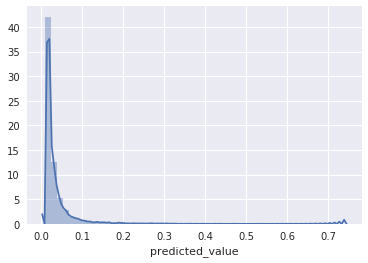

In [23]:
sns.distplot(test_res["predicted_value"])

In [24]:
test_res = test_res.sort_values("predicted_value", ascending = False)

In [25]:
test_res.head()

,chemical_id,disease_id,origin,prior_logit,prior_prob,degree_CbG,degree_DaG,dwpc_CbGaD,dwpc_CbGaDaGaD,dwpc_CbGbCbGaD,dwpc_CbGbCtD,dwpc_CtDtCtD,predicted_value,category
2697,DB00884,DOID:11476,holdout,-3.825000,0.021360,-1.4200,0.2483,3.8660,-0.2986,-0.6473,4.639,5.4620,0.738195,DM
6002,DB01583,DOID:1459,holdout,-inf,0.000000,0.8967,-0.5354,4.7880,-0.2269,3.3190,5.652,-0.2954,0.586228,DM
2638,DB00399,DOID:11476,holdout,-3.094000,0.043370,-0.2547,0.2483,3.6380,-0.9471,-0.1689,3.886,4.6370,0.570612,NaN
13087,DB00630,DOID:5408,holdout,-4.845000,0.007803,-0.4542,-1.5250,-0.5141,-0.8001,-1.0140,5.611,5.0000,0.570240,DM
2053,DB00958,DOID:11054,holdout,-2.140000,0.105300,0.7578,0.4546,4.3490,2.5150,3.2220,3.779,4.3680,0.527425,NaN


In [26]:
test_res["true_label"] = (test_res["category"] == "DM").astype(int)

In [27]:
test_res.head()

,chemical_id,disease_id,origin,prior_logit,prior_prob,degree_CbG,degree_DaG,dwpc_CbGaD,dwpc_CbGaDaGaD,dwpc_CbGbCbGaD,dwpc_CbGbCtD,dwpc_CtDtCtD,predicted_value,category,true_label
2697,DB00884,DOID:11476,holdout,-3.825000,0.021360,-1.4200,0.2483,3.8660,-0.2986,-0.6473,4.639,5.4620,0.738195,DM,1
6002,DB01583,DOID:1459,holdout,-inf,0.000000,0.8967,-0.5354,4.7880,-0.2269,3.3190,5.652,-0.2954,0.586228,DM,1
2638,DB00399,DOID:11476,holdout,-3.094000,0.043370,-0.2547,0.2483,3.6380,-0.9471,-0.1689,3.886,4.6370,0.570612,NaN,0
13087,DB00630,DOID:5408,holdout,-4.845000,0.007803,-0.4542,-1.5250,-0.5141,-0.8001,-1.0140,5.611,5.0000,0.570240,DM,1
2053,DB00958,DOID:11054,holdout,-2.140000,0.105300,0.7578,0.4546,4.3490,2.5150,3.2220,3.779,4.3680,0.527425,NaN,0


In [28]:
test_res.to_csv("pred_res_for_roc.tsv", sep = '\t', index = False)